In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from joblib import dump,load

In [2]:
# loading the dataset
df = pd.read_csv(" ")

In [3]:
df.shape

(10127, 23)

In [4]:
# Drop last two columns 
N=2
df.drop(columns=df.columns[-N:],axis=1, inplace=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
# Correlation Heatmaps
plt.figure(figsize=(15,10))
correlations = df.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);

In [6]:
# Defining the variable X with the list of selected features
X = df[['Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

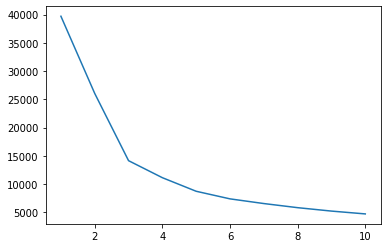

In [7]:
# Elbow method to find the number of clusters
wcss=[]
for i in range(1,11):
    pipe_test = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(2)),
        ('Kmeans', KMeans(n_clusters=i))
    ])
    pipe_test.fit(X)
    wcss.append(pipe_test[-1].inertia_)
    
plt.plot(range(1,11),wcss)

In [8]:
# Pipeline to transform all the steps together
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(2)),
    ('Kmeans', KMeans(n_clusters=3))
])

In [9]:
# Fitting the model
y_means=pipe.fit_predict(X)

In [10]:
X_pca=pipe[:-1].transform(X)

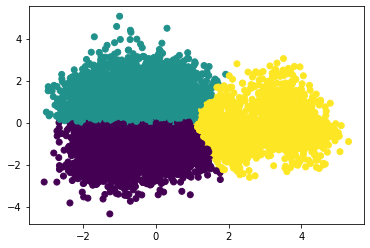

In [11]:
# Plotting the clusters
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_means)

In [12]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_pca,pipe[-1].labels_,metric='euclidean')
score

0.436690721798946

In [13]:
# Saving the model with joblib
dump(pipe,'churn.joblib')

['churn.joblib']